csvファイルをドライブにダウンロードして保管する

https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00200521&tstat=000001011777&cycle=0&tclass1=000001094741&stat_infid=000031524010&result_page=1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly

In [2]:
# url = 'https://drive.google.com/open?id=1AZR9-0uYztgMQ92qwiAzsjBvMo6IK7sn'
file_path = './data/c01.csv'

In [3]:
# data_df = pd.read_csv(file_path)
# data_df = pd.read_csv(file_path, encoding='SHIFT-JIS')
data_df = pd.read_csv(file_path, encoding='SHIFT-JIS', na_values = '-')

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 9 columns):
都道府県コード    982 non-null object
都道府県名      980 non-null object
元号         980 non-null object
和暦（年）      980 non-null float64
西暦（年）      980 non-null float64
注          96 non-null object
人口（総数）     979 non-null float64
人口（男）      979 non-null float64
人口（女）      979 non-null float64
dtypes: float64(5), object(4)
memory usage: 69.1+ KB


In [5]:
data_df[data_df['人口（総数）'].isnull()] 

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,注,人口（総数）,人口（男）,人口（女）
287,47,沖縄県,昭和,20.0,1945.0,1),NaN,NaN,NaN
980,1) 沖縄県は調査されなかったため，含まれていない。,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981,2) 長野県西筑摩群山口村と岐阜県中津川市の境界紛争地域人口（男39人，女34人）は全国に含...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_df.iloc[:, -3:] = data_df.iloc[:, -3:].fillna(0).astype(int)
data_df['西暦（年）'] = data_df['西暦（年）'].fillna(-1).astype(int)

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 9 columns):
都道府県コード    982 non-null object
都道府県名      980 non-null object
元号         980 non-null object
和暦（年）      980 non-null float64
西暦（年）      982 non-null int64
注          96 non-null object
人口（総数）     982 non-null int64
人口（男）      982 non-null int64
人口（女）      982 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 69.1+ KB


In [8]:
# data_df = pd.read_csv(url)
data_df.head()

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,注,人口（総数）,人口（男）,人口（女）
0,00,全国,大正,9.0,1920,NaN,55963053,28044185,27918868
1,01,北海道,大正,9.0,1920,NaN,2359183,1244322,1114861
2,02,青森県,大正,9.0,1920,NaN,756454,381293,375161
3,03,岩手県,大正,9.0,1920,NaN,845540,421069,424471
4,04,宮城県,大正,9.0,1920,NaN,961768,485309,476459


In [9]:
data_df.head()

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,注,人口（総数）,人口（男）,人口（女）
0,00,全国,大正,9.0,1920,NaN,55963053,28044185,27918868
1,01,北海道,大正,9.0,1920,NaN,2359183,1244322,1114861
2,02,青森県,大正,9.0,1920,NaN,756454,381293,375161
3,03,岩手県,大正,9.0,1920,NaN,845540,421069,424471
4,04,宮城県,大正,9.0,1920,NaN,961768,485309,476459


In [10]:
data_df_target = data_df[data_df['都道府県名'] == '全国']

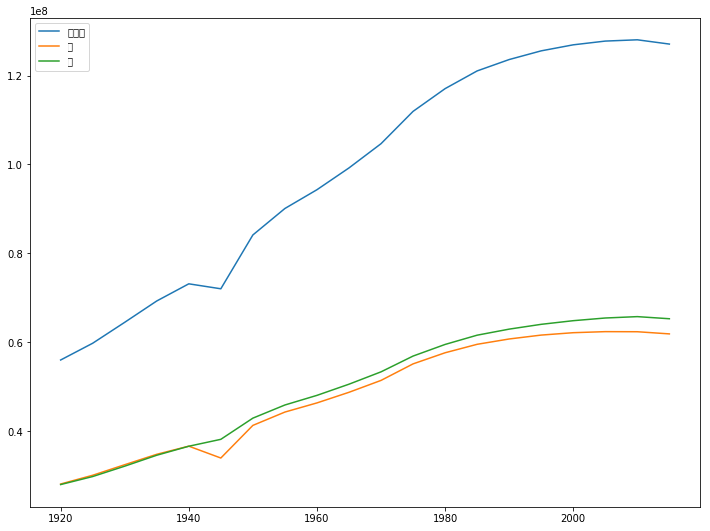

In [11]:
plt.figure(figsize=(12, 9))
plt.plot(data_df_target['西暦（年）'], data_df_target['人口（総数）'], label='総人口')
plt.plot(data_df_target['西暦（年）'], data_df_target['人口（男）'], label='男')
plt.plot(data_df_target['西暦（年）'], data_df_target['人口（女）'], label='女')
plt.legend()

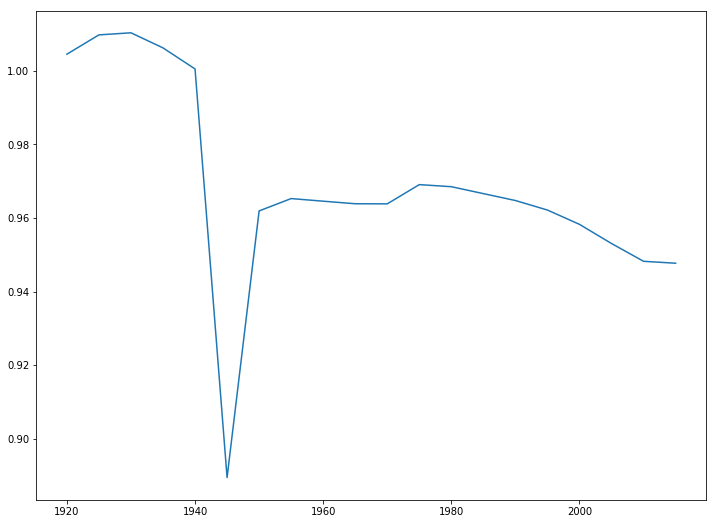

In [12]:
plt.figure(figsize=(12, 9))
plt.plot(data_df_target['西暦（年）'], data_df_target['人口（男）']/data_df_target['人口（女）'])

# plotly

In [13]:
import plotly.express as px

In [14]:
plotly.__version__

'4.3.0'

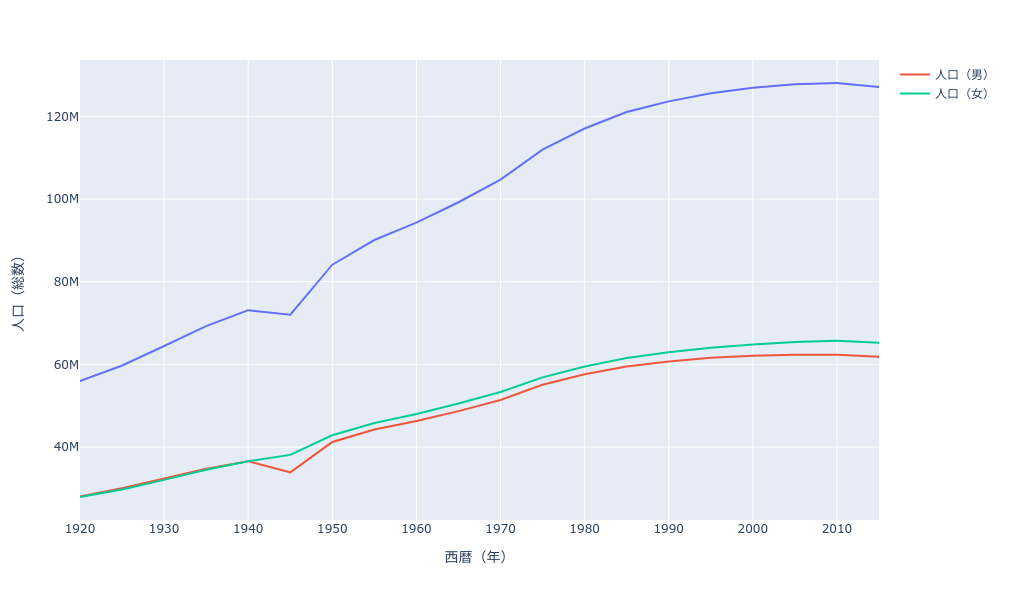

In [37]:
fig = px.line(data_df_target, x='西暦（年）', y='人口（総数）')
# fig.add_scatter(data_df_target, x='西暦（年）', y='人口（男）', mode='lines')
fig.add_scatter(x=data_df_target['西暦（年）'], y=data_df_target['人口（男）'], mode='lines', name='人口（男）')
fig.add_scatter(x=data_df_target['西暦（年）'], y=data_df_target['人口（女）'], mode='lines', name='人口（女）')
# px.line(data_df_target, x='西暦（年）', y='人口（男）')
fig.show()

# excel

In [3]:
# path = '/home/sen/Downloads/san01hyo.xls'

In [4]:
# df = pd.read_excel('https://www.meti.go.jp/statistics/toppage/jikeiretsu/xls/san01hyo.xls')
# df = pd.read_excel(path)

In [6]:
# df